# ロジスティクス関数（別名シグモイド関数）

$- \infty$ から $\infty$ の実数を0~1の範囲に変換する関数のこと。

定義は

$$
σ(z) = \frac{1}{1+e^{-z}}
$$

手続き的に言い換えると「ネイピア数$e$を$z$乗した結果の逆数に１に加えた結果の逆数」となります。


特徴としては
- $z$が０の時は0.5で、$z$が０よりとても大きいとほぼ１になり、$z$が０よりとても小さいとほぼ０になる。
- 非常に大きい数は$1$に収束（飽和）し、非常に小さい数は$0$に収束（飽和）するので、広い幅（レンジ）の値を0~1というレンジに押し込むことが出来る。
- 幅広いレンジを圧縮することで可視化しやすくなり、一種のスケール変換関数として便利
- 0~1の確率の範囲として表す際に利用されることが多い（でもロジスティック関数の結果が確率を表すとは限らない）

その変換の様子を実感できるように、左側に「入力を示すグラフ」右側にロジスティクス関数を通した結果をしめすグラフを生成させます。

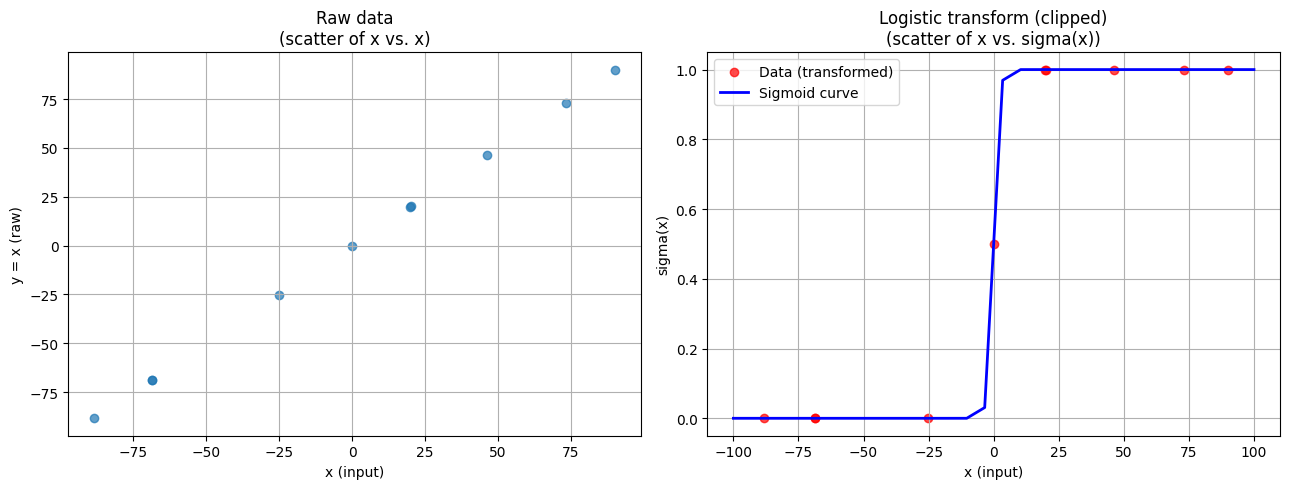

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_clipped(z):
    # 極端に大きい値はクリップしてオーバーフローを防ぐ
    z_clipped = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_clipped))

# --------------------------
# 1. データを用意
# --------------------------
np.random.seed(42)
N = 10

# -200 ～ +200の範囲で9個ランダムに生成
x_random = np.random.uniform(-100, 100, size=N-1)
# 0 付近の点を1つ追加 (これでシグモイド変換後 0.5 になる)
x_data = np.hstack((x_random, 0.0))

# ロジスティック変換（クリッピング版）
y_sigmoid = sigmoid_clipped(x_data)

# --------------------------
# 2. S字カーブ用の連続データ
# --------------------------
x_line = np.linspace(-100, 100, 30)
y_line = sigmoid_clipped(x_line)

# --------------------------
# 3. 可視化 (サブプロットで左右比較)
# --------------------------
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 左側: 「生のデータ」(x, x) の散布図
axes[0].scatter(x_data, x_data, alpha=0.7)
axes[0].set_title("Raw data\n(scatter of x vs. x)")
axes[0].set_xlabel("x (input)")
axes[0].set_ylabel("y = x (raw)")
axes[0].grid(True)

# 右側: 「ロジスティック変換」(x, sigmoid(x)) の散布図 + S字カーブ
axes[1].scatter(x_data, y_sigmoid, color='red', alpha=0.7, label="Data (transformed)")
axes[1].plot(x_line, y_line, color='blue', linewidth=2, label="Sigmoid curve")
axes[1].set_title("Logistic transform (clipped)\n(scatter of x vs. sigma(x))")
axes[1].set_xlabel("x (input)")
axes[1].set_ylabel("sigma(x)")
axes[1].set_ylim(-0.05, 1.05)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


もうすこし「S字カーブ」になるようにしたかったんですが、入力データがそれぞれ0~1のどこかにマッピングされる様子はイメージできます。

次にもう少し教科書にあるようなロジスティクス関数のグラフを描きます。

z  -->  sigmoid(z)
-10 --> 0.000045
 -5 --> 0.006693
 -2 --> 0.119203
 -1 --> 0.268941
  0 --> 0.500000
  1 --> 0.731059
  2 --> 0.880797
  5 --> 0.993307
 10 --> 0.999955


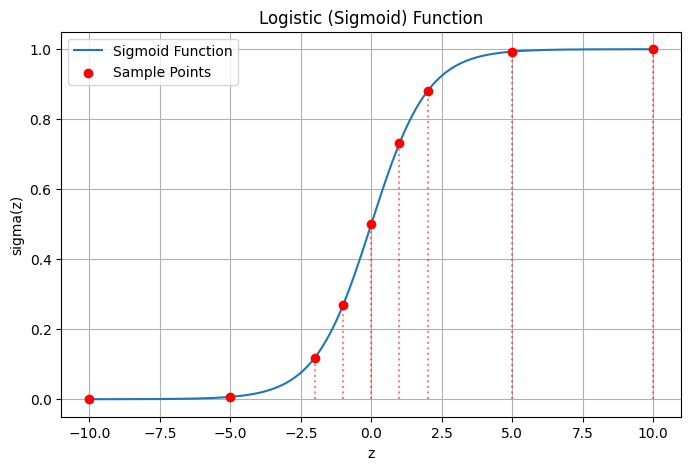

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 1. 具体的な入力値のサンプルをリストで用意
sample_z = np.array([-10, -5, -2, -1, 0, 1, 2, 5, 10])

# 2. それぞれの z に対してシグモイド関数の値を計算
sample_sigmoid = sigmoid(sample_z)

# 3. 計算結果をテキストで表示してみる
print("z  -->  sigmoid(z)")
for z_val, s_val in zip(sample_z, sample_sigmoid):
    print(f"{z_val:>3} --> {s_val:.6f}")

# 4. 連続的な z の値を用意してロジスティック関数をプロット
z_continuous = np.linspace(-10, 10, 200)
sigmoid_continuous = sigmoid(z_continuous)

plt.figure(figsize=(8, 5))
plt.plot(z_continuous, sigmoid_continuous, label='Sigmoid Function')

# 5. 具体的サンプル点を散布図で重ねる
plt.scatter(sample_z, sample_sigmoid, color='red', zorder=5, label='Sample Points')

# 6. 各サンプル点と x軸の間を線で繋ぐ（目で見てわかりやすくするため）
for z_val, s_val in zip(sample_z, sample_sigmoid):
    plt.vlines(x=z_val, ymin=0, ymax=s_val, color='red', linestyle='dotted', alpha=0.5)

# 7. グラフの体裁を整える
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('z')
plt.ylabel('sigma(z)')
plt.ylim(-0.05, 1.05)  # 少し余裕を持たせる
plt.grid(True)
plt.legend()
plt.show()


今回は見やすい「S字カーブ」になりました。要点はどんなに小さな数も大きいな数も$0$が真ん中の$0.5$になるようなS字カーブにマップされることです。

# 入力が単純な$z$でない場合のロジスティック関数の様子

ロジスティック関数そのものは

$$
σ(z) = \frac{1}{1+e^{-z}}
$$

で表わされ、グラフも一定の特徴をもっています。zの値しだいでどんな値に変換されるかは変わりますが、変換そのものは一定です。

でも、zの値が単純ではなく、例えば$z = wx + b$ だとしたら$w$と$b$の値がグラフに影響を与えます。

以下の式で$w$と$b$の値をいくつか試してその効果を確認してみます。

$$
σ(z) = \frac{1}{1+e^{-wx+b}}
$$

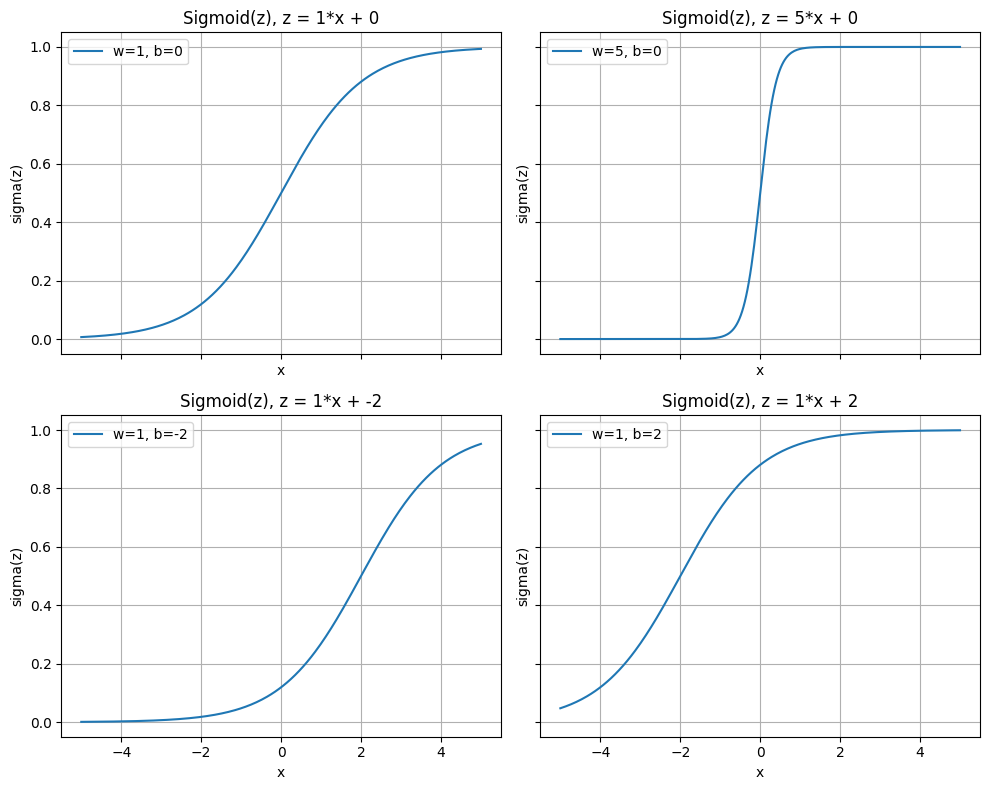

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# パラメータの組をいくつか用意して比較
params_list = [
    {"w": 1,  "b": 0},
    {"w": 5,  "b": 0},
    {"w": 1,  "b": -2},
    {"w": 1,  "b": 2}
]

x = np.linspace(-5, 5, 300)

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()  # 2x2 のサブプロットを配列に

for i, param in enumerate(params_list):
    w, b = param["w"], param["b"]
    z = w * x + b
    y = sigmoid(z)
    
    # サブプロットごとに描画
    axes[i].plot(x, y, label=f"w={w}, b={b}")
    
    # 軸の調整など
    axes[i].set_title(f"Sigmoid(z), z = {w}*x + {b}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("sigma(z)")
    axes[i].set_ylim(-0.05, 1.05)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()


４つのグラフのうち、上段２つで「$w$が$1$のとき」と「$w$が$5$のとき」を比較できます。値が大きい$5$の方が「急激に」1もしくは０に飽和することが分かります。これは大きい係数でネイピア数$e$を乗算するので、ロジスティクス関数の分母の部分も急激に大きくなったり小さくなり、つまりはその逆数も急激に変化すると理解できます。

グラフの下段２つは「$b$が$-2$のとき」と「$b$が$2$のとき」を比較できます。これは出力が$0.5$になる点が水平方向にシフトする効果が見えます。$w=1$という標準的な場合は$b=-2$の時は単純に$x=2$の時に出力が$0.5$になっています。$0.5$は$\frac{1}{1+1}$で、ロジスティクス関数の式がこの形になる$x$が、この場合は$-2$ということです。（出力が$0.5$になる$x$の値は$x = - \frac{b}{w}$で分かります）

# ロジスティック回帰との混同

ロジスティクス関数（別名シグモイド関数）は単なる変換関数で、入力を0~1の範囲にしてくれるというだけの話。その点、ロジスティック回帰は同じ「ロジスティック」という言葉が入っているので混同されやすいが別物。

以下はロジスティック回帰を使って回帰分析をする例。


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# ダミーデータの作成
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([0, 0, 1, 1])

# ロジスティック回帰モデルの作成と学習
model = LogisticRegression()
model.fit(X, y)

# 新しいデータに対する予測
new_data = np.array([[3, 5]])
predicted_prob = model.predict_proba(new_data)

print("予測確率:", predicted_prob)


上のコードではskylearnライブラリからLogisticRegressionという、訓練がまだ行われていないモデルを、ダミーデータを使って訓練します。その結果、モデル内で重みとバイアスが最適化されます。次に、predict_proba関数が、内部でロジスティクス関数と、先の重みとバイアスを用いて、未知の値を処理し、０か１のどちらかにより近いかを確率として出力しています。

ロジスティック回帰をまとめると、分類問題において、特定の事象の発生確率をモデル化するための統計的手法で、主に二値分類に用いられ、以下の式で表されます。

$$
P(y=1|X) = \sigma(w \cdot X + b)
$$

ここで、$\sigma(z)$はシグモイド関数（ロジスティクス関数）であり、次のように定義されます：

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

重み$w$とバイアス$b$は、データに基づいて最適化されます。
